In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("very_clean_data.csv")
df = df.drop(columns=['Unnamed: 0'])
print(df)

     Manufacturer                           Model Name            Category  \
0           Apple                          MacBook Pro           Ultrabook   
1           Apple                          Macbook Air           Ultrabook   
2              HP                               250 G6            Notebook   
3           Apple                          MacBook Pro           Ultrabook   
4           Apple                          MacBook Pro           Ultrabook   
...           ...                                  ...                 ...   
1297       Lenovo                       Yoga 500-14ISK  2 in 1 Convertible   
1298       Lenovo                       Yoga 900-13ISK  2 in 1 Convertible   
1299       Lenovo                   IdeaPad 100S-14IBR            Notebook   
1300           HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook   
1301         Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook   

      Screen Size                           GPU Operating Syste

In [4]:
Ultrabook = df.loc[df['Category'] == 'Ultrabook']
Notebook = df.loc[df['Category'] == 'Notebook']
Netbook = df.loc[df['Category'] == 'Netbook']
Gaming = df.loc[df['Category'] == 'Gaming']
Convertible = df.loc[df['Category'] == '2 in 1 Convertible']
Workstation = df.loc[df['Category'] == 'Workstation']

In [5]:
def getSSE(prediction, fact):
    total = 0
    for i in range(len(prediction)):
        temp = (prediction[i] - fact[i])**2
        total += temp
    return total
def plotResults(df, name, y, x_test, y_test, pred):
    plt.figure(1, figsize=(20,10))
    plt.subplot(231)
    plt.scatter(df['RAM'], y)
    plt.title('RAM vs Price (All ' + name + ')')
    plt.xlabel('RAM size (GB)')
    plt.ylabel('Price (Pounds)')
    plt.subplot(232)
    plt.scatter(df['fullRes'], y)
    plt.title('fullRes vs Price (All ' + name + ')')
    plt.xlabel('fullRes (no. pixels)')
    plt.ylabel('Price (Pounds)')
    plt.subplot(233)
    plt.scatter(df['Clockspeed'], y)
    plt.title('Clockspeed vs Price (All ' + name + ')')
    plt.xlabel('Clockspeed (GHz)')
    plt.ylabel('Price (Pounds)')
    plt.subplot(234)
    plt.scatter([i[0] for i in x_test],y_test, c='red')
    plt.scatter([i[0] for i in x_test],pred)
    plt.title('RAM vs Price (Test ' + name + ')')
    plt.xlabel('RAM size (GB)')
    plt.ylabel('Price (Pounds)')
    plt.subplot(235)
    plt.scatter([i[1] for i in x_test],y_test, c='red')
    plt.scatter([i[1] for i in x_test],pred)
    plt.title('fullRes vs Price (Test ' + name + ')')
    plt.xlabel('fullRes (no. pixels)')
    plt.ylabel('Price (Pounds)')
    plt.subplot(236)
    plt.scatter([i[2] for i in x_test],y_test, c='red')
    plt.scatter([i[2] for i in x_test],pred)
    plt.title('Clockspeed vs Price (Test ' + name + ')')
    plt.xlabel('Clockspeed (GHz)')
    plt.ylabel('Price (Pounds)')
    plt.show()




MSE           SSE           R2           
189351.931105 11171763.935210 0.222946    


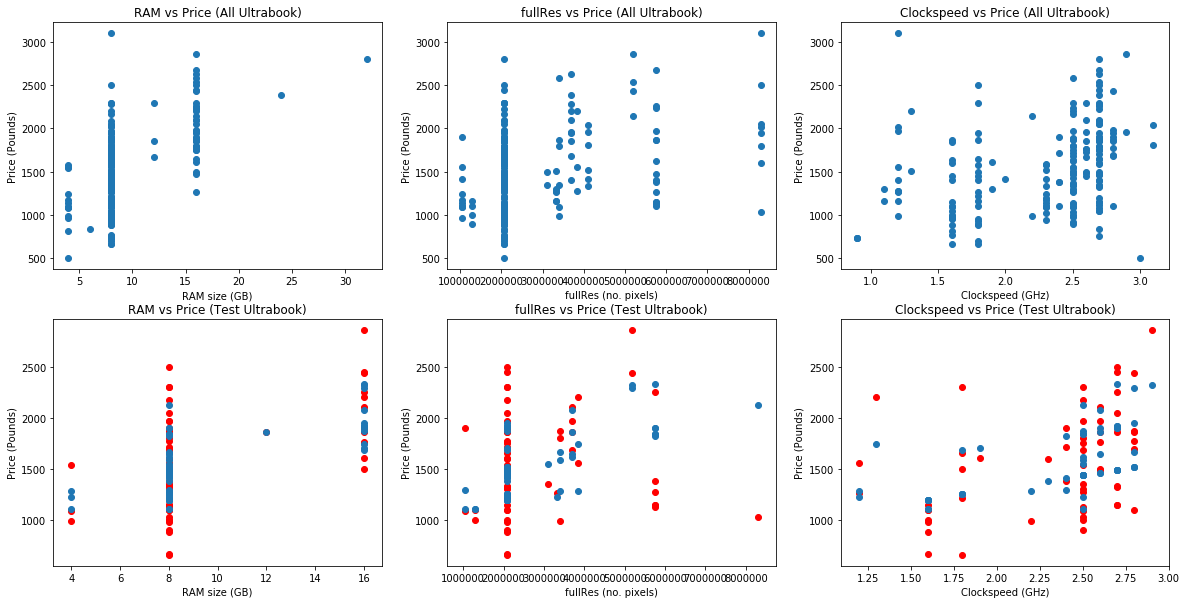

In [7]:
# Ultrabook
ultra_x = Ultrabook[['RAM', 'fullRes', 'Clockspeed']].values
ultra_y = Ultrabook['Price (Euros)'].values
ultra_x_train, ultra_x_test, ultra_y_train, ultra_y_test = train_test_split(ultra_x, ultra_y, test_size = 0.3, random_state = 2201798761)
ultra_regr = linear_model.LinearRegression()
ultra_regr.fit(ultra_x_train, ultra_y_train)

ultra_pred = ultra_regr.predict(ultra_x_test)
ultra_mse = mean_squared_error(ultra_y_test, ultra_pred)
ultra_sse = getSSE(ultra_pred, ultra_y_test)
ultra_r2 = r2_score(ultra_y_test, ultra_pred)
print('{:13}'.format('MSE'), '{:13}'.format('SSE'), '{:13}'.format('R2'))
print('{:12f}'.format(ultra_mse), '{:12f}'.format(ultra_sse), '{:<12f}'.format(ultra_r2))
plotResults(Ultrabook,"Ultrabook",ultra_y,ultra_x_test,ultra_y_test,ultra_pred)

MSE           SSE           R2           
101238.575042 22171247.934149 0.622826    


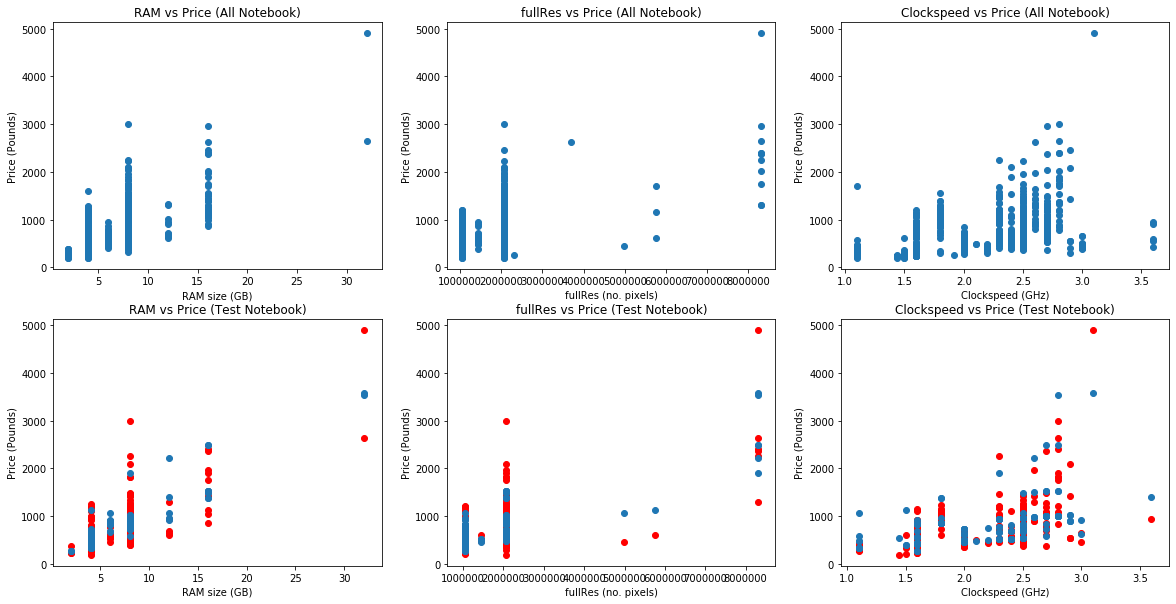

In [8]:
# Notebook
note_x = Notebook[['RAM', 'fullRes', 'Clockspeed']].values
note_y = Notebook['Price (Euros)'].values
note_x_train, note_x_test, note_y_train, note_y_test = train_test_split(note_x, note_y, test_size = 0.3, random_state = 2201798761)
note_regr = linear_model.LinearRegression()
note_regr.fit(note_x_train, note_y_train)

note_pred = note_regr.predict(note_x_test)
note_mse = mean_squared_error(note_y_test, note_pred)
note_sse = getSSE(note_pred, note_y_test)
note_r2 = r2_score(note_y_test, note_pred)
print('{:13}'.format('MSE'), '{:13}'.format('SSE'), '{:13}'.format('R2'))
print('{:12f}'.format(note_mse), '{:12f}'.format(note_sse), '{:<12f}'.format(note_r2))
plotResults(Notebook,"Notebook",note_y,note_x_test,note_y_test,note_pred)


MSE           SSE           R2           
33857.115668 270856.925347 0.837053    


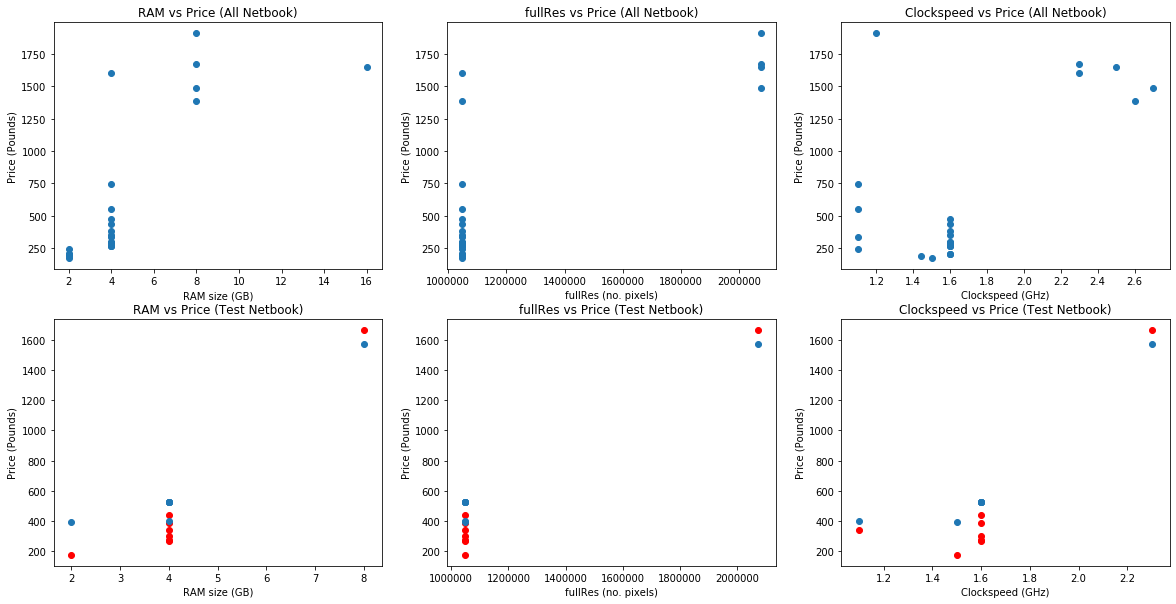

In [9]:
# Netbook
net_x = Netbook[['RAM', 'fullRes', 'Clockspeed']].values
net_y = Netbook['Price (Euros)'].values
net_x_train, net_x_test, net_y_train, net_y_test = train_test_split(net_x, net_y, test_size = 0.3, random_state = 2201798761)
net_regr = linear_model.LinearRegression()
net_regr.fit(net_x_train, net_y_train)

net_pred = net_regr.predict(net_x_test)
net_mse = mean_squared_error(net_y_test, net_pred)
net_sse = getSSE(net_pred, net_y_test)
net_r2 = r2_score(net_y_test, net_pred)
print('{:13}'.format('MSE'), '{:13}'.format('SSE'), '{:13}'.format('R2'))
print('{:12f}'.format(net_mse), '{:12f}'.format(net_sse), '{:<12f}'.format(net_r2))
plotResults(Netbook,"Netbook",net_y,net_x_test,net_y_test,net_pred)


MSE           SSE           R2           
234625.422864 14546776.217539 0.687907    


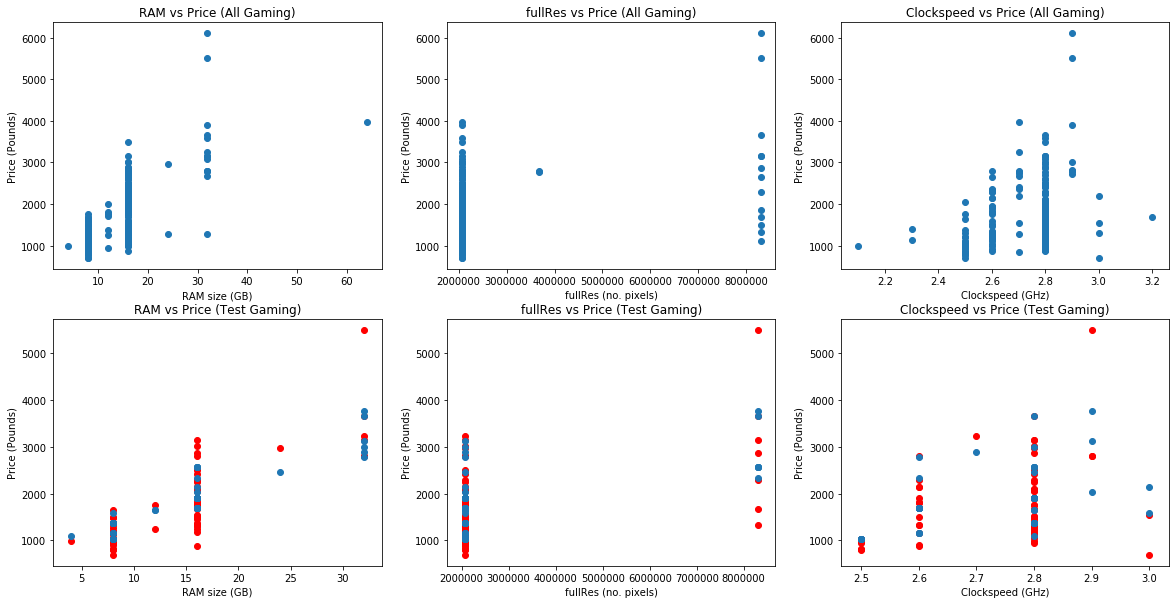

In [10]:
# Gaming
game_x = Gaming[['RAM', 'fullRes', 'Clockspeed']].values
game_y = Gaming['Price (Euros)'].values
game_x_train, game_x_test, game_y_train, game_y_test = train_test_split(game_x, game_y, test_size = 0.3, random_state = 2201798761)
game_regr = linear_model.LinearRegression()
game_regr.fit(game_x_train, game_y_train)

game_pred = game_regr.predict(game_x_test)
game_mse = mean_squared_error(game_y_test, game_pred)
game_sse = getSSE(game_pred, game_y_test)
game_r2 = r2_score(game_y_test, game_pred)
print('{:13}'.format('MSE'), '{:13}'.format('SSE'), '{:13}'.format('R2'))
print('{:12f}'.format(game_mse), '{:12f}'.format(game_sse), '{:<12f}'.format(game_r2))
plotResults(Gaming,"Gaming",game_y,game_x_test,game_y_test,game_pred)

MSE           SSE           R2           
252810.986501 9101195.514049 0.181806    


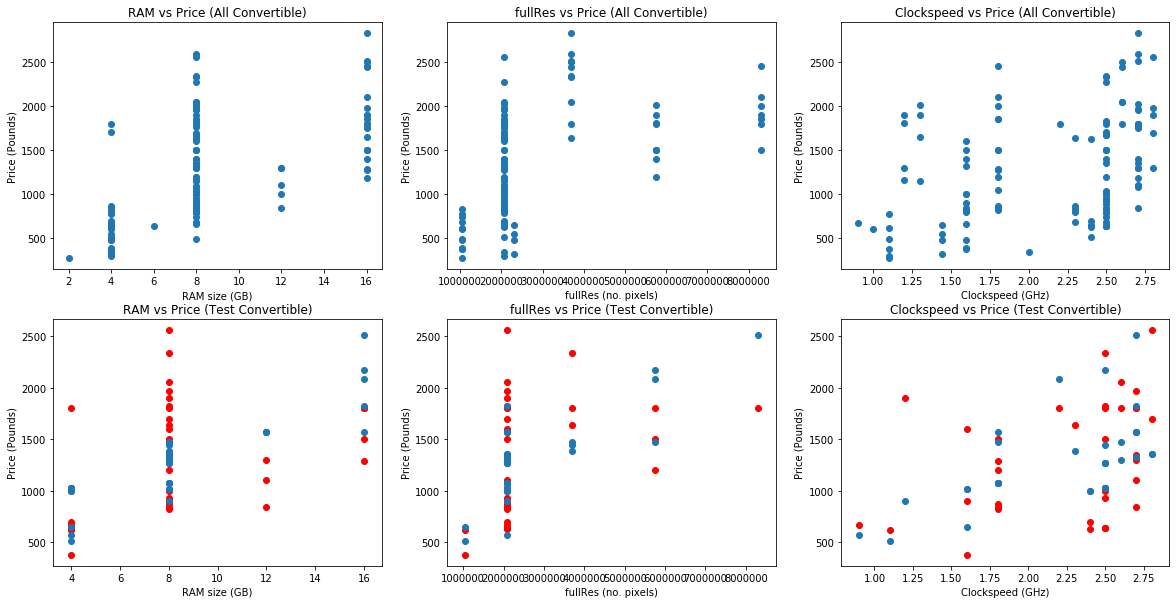

In [11]:
# Convertible
conv_x = Convertible[['RAM', 'fullRes', 'Clockspeed']].values
conv_y = Convertible['Price (Euros)'].values
conv_x_train, conv_x_test, conv_y_train, conv_y_test = train_test_split(conv_x, conv_y, test_size = 0.3, random_state = 2201798761)
conv_regr = linear_model.LinearRegression()
conv_regr.fit(conv_x_train, conv_y_train)

conv_pred = conv_regr.predict(conv_x_test)
conv_mse = mean_squared_error(conv_y_test, conv_pred)
conv_sse = getSSE(conv_pred, conv_y_test)
conv_r2 = r2_score(conv_y_test, conv_pred)
print('{:13}'.format('MSE'), '{:13}'.format('SSE'), '{:13}'.format('R2'))
print('{:12f}'.format(conv_mse), '{:12f}'.format(conv_sse), '{:<12f}'.format(conv_r2))
plotResults(Convertible,"Convertible",conv_y,conv_x_test,conv_y_test,conv_pred)

MSE           SSE           R2           
381991.535647 3437923.820822 -0.694373   


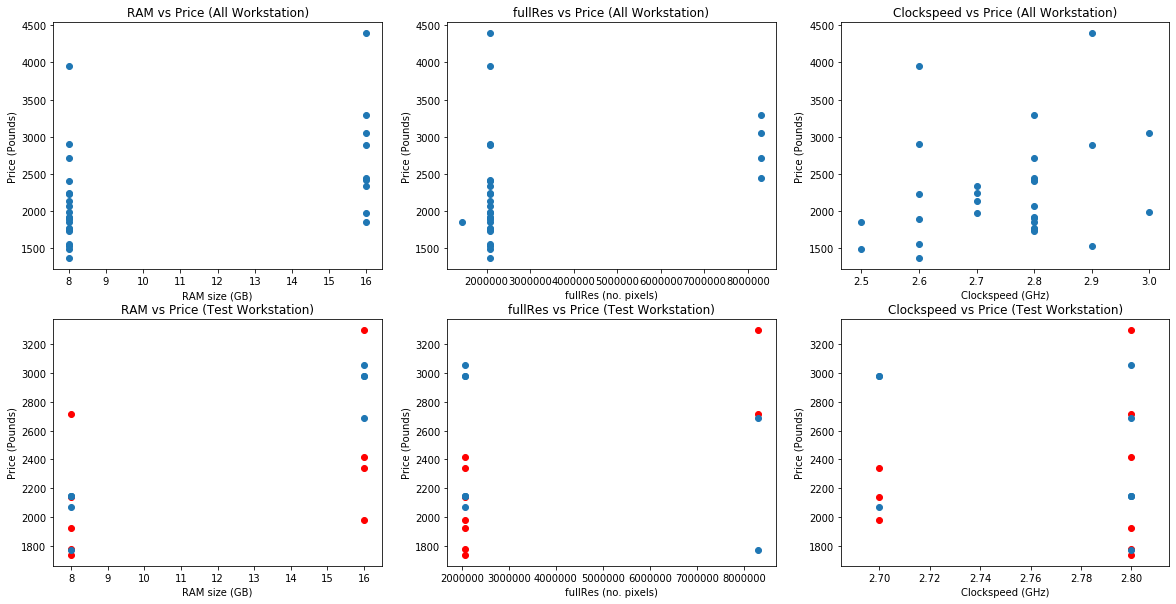

In [12]:
# Workstation
work_x = Workstation[['RAM', 'fullRes', 'Clockspeed']].values
work_y = Workstation['Price (Euros)'].values
work_x_train, work_x_test, work_y_train, work_y_test = train_test_split(work_x, work_y, test_size = 0.3, random_state = 2201798761)
work_regr = linear_model.LinearRegression()
work_regr.fit(work_x_train, work_y_train)

work_pred = work_regr.predict(work_x_test)
work_mse = mean_squared_error(work_y_test, work_pred)
work_sse = getSSE(work_pred, work_y_test)
work_r2 = r2_score(work_y_test, work_pred)
print('{:13}'.format('MSE'), '{:13}'.format('SSE'), '{:13}'.format('R2'))
print('{:12f}'.format(work_mse), '{:12f}'.format(work_sse), '{:<12f}'.format(work_r2))
plotResults(Workstation,"Workstation",work_y,work_x_test,work_y_test,work_pred)

--------------Independent Variables used for multidimensional linear regression--------------
      RAM  fullRes  Clockspeed
0       8  4096000         2.3
1       8  1296000         1.8
2       8  2073600         2.5
3      16  5184000         2.7
4       8  4096000         3.1
...   ...      ...         ...
1297    4  2073600         2.5
1298   16  5760000         2.5
1299    2  1049088         1.6
1300    6  1049088         2.5
1301    4  1049088         1.6

[1302 rows x 3 columns]
----------------Dependent Variable used for multidimensional linear regression---------------
0       1339
1        898
2        575
3       2537
4       1803
        ... 
1297     638
1298    1499
1299     229
1300     764
1301     369
Name: Price (Euros), Length: 1302, dtype: int64


Intercept:  -407.3864965595617
Coefficients:  [7.83307256e+01 1.33170348e-04 2.54811516e+02]
3


                            OLS Regression Results                            
Dep. Variable:          Price (Euros)   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     767.5
Date:                Fri, 06 Nov 2020   Prob (F-statistic):          6.39e-287
Time:                        12:47:34   Log-Likelihood:                -9710.8
No. Observations:                1302   AIC:                         1.943e+04
Df Residuals:                    1298   BIC:                         1.945e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -407.3865     55.486     -7.342      0.0

 3333.000000


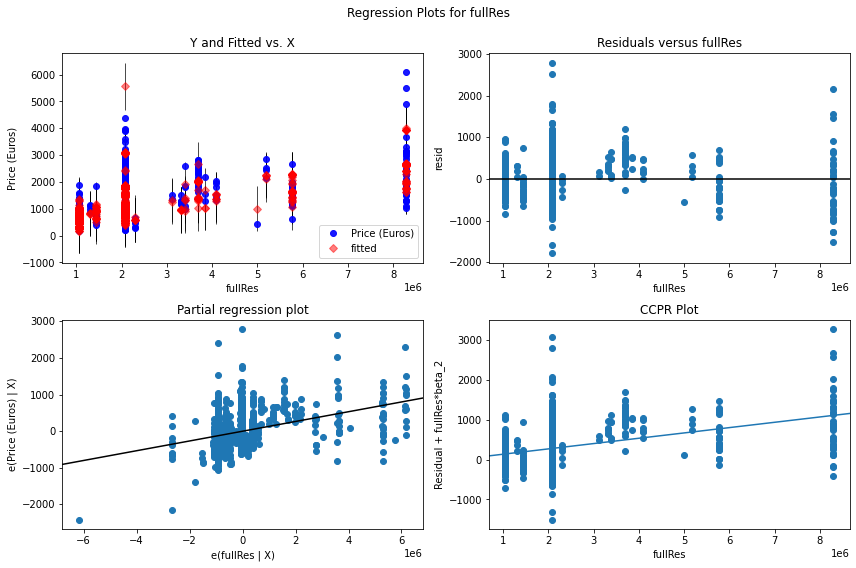

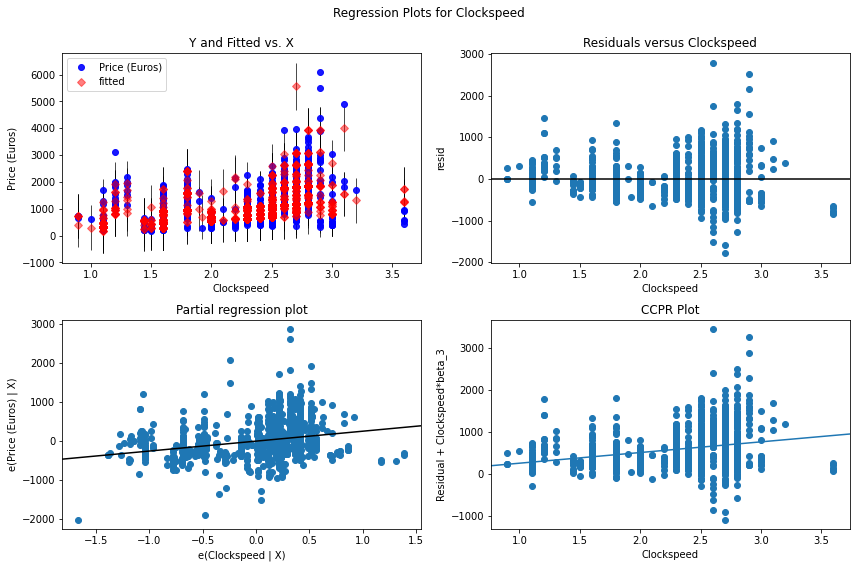

array([1387.24164706])

a b
